<a href="https://colab.research.google.com/github/Yuvraj-Singh01/PSO-ALO-Smart-Farming/blob/main/PSO_Smart_Farming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [34]:
!pip install optuna

!pip install optuna-integration[tfkeras]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 3.4 MB/s eta 0:00:00


In [35]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import optuna

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from optuna.integration import TFKerasPruningCallback

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models




In [5]:
!pip install kaggle

In [6]:
!pip install -q kaggle optuna

In [7]:
from google.colab import files
files.upload()  # then upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"liquidrainbowx7","key":"7ef6ba72e6dfdb6c1caed61546b91936"}'}

In [8]:
kaggle_credentails = json.load(open("kaggle.json"))

In [9]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]


In [10]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0


In [11]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [13]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])


['color', 'segmented', 'grayscale']
38
['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Tomato___healthy', 'Raspberry___healthy']
38
['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Tomato___healthy', 'Raspberry___healthy']
38
['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Tomato___healthy', 'Raspberry___healthy']


In [14]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])


423
['c48a4277-3bd4-45c8-be06-8bdc4404f252___Mt.N.V_HL 6137.JPG', 'b67328d6-9735-4220-83a6-3b3568162527___Mt.N.V_HL 6169.JPG', 'cdecb518-57f1-45f1-bfd6-bf97697215c2___Mt.N.V_HL 6037.JPG', '30ef1555-5cbf-4516-a2ee-aa2f43343810___Mt.N.V_HL 9120.JPG', 'e1520328-8fdd-42a9-bd49-95721a89078c___Mt.N.V_HL 6125.JPG']


In [52]:
base_dir = "plantvillage dataset/color"

img_size = (64, 64)
batch_size = 16

(256, 256, 3)


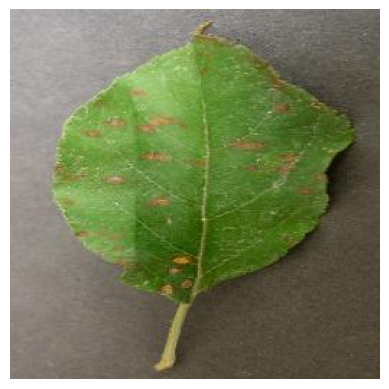

In [53]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [54]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[179 175 176]
  [181 177 178]
  [184 180 181]
  ...
  [115 112 105]
  [108 105  98]
  [101  98  91]]

 [[176 172 173]
  [177 173 174]
  [178 174 175]
  ...
  [113 110 103]
  [111 108 101]
  [109 106  99]]

 [[180 176 177]
  [180 176 177]
  [180 176 177]
  ...
  [108 105  98]
  [111 108 101]
  [114 111 104]]

 ...

 [[137 128 119]
  [131 122 113]
  [125 116 107]
  ...
  [ 74  65  48]
  [ 74  65  48]
  [ 73  64  47]]

 [[136 127 118]
  [132 123 114]
  [128 119 110]
  ...
  [ 77  69  50]
  [ 75  67  48]
  [ 75  67  48]]

 [[133 124 115]
  [133 124 115]
  [132 123 114]
  ...
  [ 81  73  54]
  [ 80  72  53]
  [ 79  71  52]]]


In [55]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [56]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)


Found 10849 images belonging to 38 classes.


In [57]:
num_classes = train_generator.num_classes

In [58]:
from tensorflow.keras import optimizers

In [63]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths
base_dir = "plantvillage dataset/color"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")

# Create train and val folders if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Get class names
classes = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d)) and d not in ['train', 'val']]

# Split for each class
for cls in classes:
    cls_path = os.path.join(base_dir, cls)
    images = os.listdir(cls_path)
    train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

    # Create class folders
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(val_dir, cls), exist_ok=True)

    # Move training images
    for img in train_images:
        shutil.copy(os.path.join(cls_path, img), os.path.join(train_dir, cls, img))

    # Move validation images
    for img in val_images:
        shutil.copy(os.path.join(cls_path, img), os.path.join(val_dir, cls, img))

print("✅ Dataset successfully split into training and validation folders.")


✅ Dataset successfully split into training and validation folders.


In [64]:
import os
import optuna
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Paths
base_dir = "plantvillage dataset/color"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")

# Image size and batch size
img_size = (64, 64)
batch_size = 16

# Image generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Define objective function
def objective(trial):
    filters1 = trial.suggest_categorical("filters1", [32, 64])
    filters2 = trial.suggest_categorical("filters2", [64, 128])
    dense_units = trial.suggest_int("dense_units", 128, 512)
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)

    # Build CNN model
    model = models.Sequential([
        layers.Conv2D(filters1, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters2, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(dense_units, activation='relu'),
        layers.Dense(train_generator.num_classes, activation='softmax')
    ])

    # Compile model
    optimizer = optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    try:
        # Train model
        history = model.fit(
            train_generator,
            epochs=1,
            steps_per_epoch=100,
            validation_data=validation_generator,
            validation_steps=10,
            verbose=0
        )
        val_accuracy = history.history['val_accuracy'][-1]
        return val_accuracy
    except tf.errors.ResourceExhaustedError:
        return 0.0  # Handle OOM gracefully

# Run Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Output best result
print("Best trial:")
print(f"  Accuracy: {study.best_trial.value}")
print("  Params:")
for key, value in study.best_trial.params.items():
    print(f"    {key}: {value}")


Found 43429 images belonging to 38 classes.
Found 10876 images belonging to 38 classes.


[I 2025-04-10 06:22:46,322] A new study created in memory with name: no-name-3fa01319-be50-475b-8875-b3bdcc23a9bd
[I 2025-04-10 06:22:52,278] Trial 0 finished with value: 0.39375001192092896 and parameters: {'filters1': 32, 'filters2': 64, 'dense_units': 495, 'learning_rate': 0.0007712920448588349}. Best is trial 0 with value: 0.39375001192092896.
[I 2025-04-10 06:22:57,377] Trial 1 finished with value: 0.2562499940395355 and parameters: {'filters1': 32, 'filters2': 128, 'dense_units': 439, 'learning_rate': 0.0024980841531262303}. Best is trial 0 with value: 0.39375001192092896.
[I 2025-04-10 06:23:03,156] Trial 2 finished with value: 0.3187499940395355 and parameters: {'filters1': 64, 'filters2': 128, 'dense_units': 159, 'learning_rate': 0.0009390350267015639}. Best is trial 0 with value: 0.39375001192092896.
[I 2025-04-10 06:23:08,757] Trial 3 finished with value: 0.23749999701976776 and parameters: {'filters1': 64, 'filters2': 128, 'dense_units': 257, 'learning_rate': 0.001920392972

Best trial:
  Accuracy: 0.39375001192092896
  Params:
    filters1: 32
    filters2: 64
    dense_units: 495
    learning_rate: 0.0007712920448588349


In [65]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Best hyperparameters
best_params = study.best_trial.params

# Rebuild best model
best_model = models.Sequential([
    layers.Conv2D(best_params['filters1'], (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(best_params['filters2'], (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(best_params['dense_units'], activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

optimizer = optimizers.Adam(learning_rate=best_params['learning_rate'])
best_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Retrain model
history = best_model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2715/2715 ━━━━━━━━━━━━━━━━━━━━ 59s 21ms/step - accuracy: 0.5979 - loss: 1.4395 - val_accuracy: 0.8705 - val_loss: 0.4080
Epoch 2/5
2715/2715 ━━━━━━━━━━━━━━━━━━━━ 52s 19ms/step - accuracy: 0.8875 - loss: 0.3443 - val_accuracy: 0.9106 - val_loss: 0.2824
Epoch 3/5
2715/2715 ━━━━━━━━━━━━━━━━━━━━ 55s 20ms/step - accuracy: 0.9350 - loss: 0.1926 - val_accuracy: 0.8903 - val_loss: 0.3551
Epoch 4/5
2715/2715 ━━━━━━━━━━━━━━━━━━━━ 52s 19ms/step - accuracy: 0.9584 - loss: 0.1181 - val_accuracy: 0.9133 - val_loss: 0.3036
Epoch 5/5
2715/2715 ━━━━━━━━━━━━━━━━━━━━ 53s 19ms/step - accuracy: 0.9724 - loss: 0.0849 - val_accuracy: 0.9089 - val_loss: 0.3412


In [66]:
import numpy as np

# Reset generator before predictions
validation_generator.reset()

# Predict probabilities and labels
pred_probs = best_model.predict(validation_generator, verbose=1)
pred_classes = np.argmax(pred_probs, axis=1)

# True labels
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())


680/680 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step


Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.00      0.00      0.00       126
                                 Apple___Black_rot       0.01      0.01      0.01       125
                          Apple___Cedar_apple_rust       0.00      0.00      0.00        55
                                   Apple___healthy       0.03      0.03      0.03       329
                               Blueberry___healthy       0.01      0.01      0.01       301
          Cherry_(including_sour)___Powdery_mildew       0.02      0.02      0.02       211
                 Cherry_(including_sour)___healthy       0.02      0.02      0.02       171
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00       103
                       Corn_(maize)___Common_rust_       0.03      0.03      0.03       239
               Corn_(maize)___Northern_Leaf_Blight      

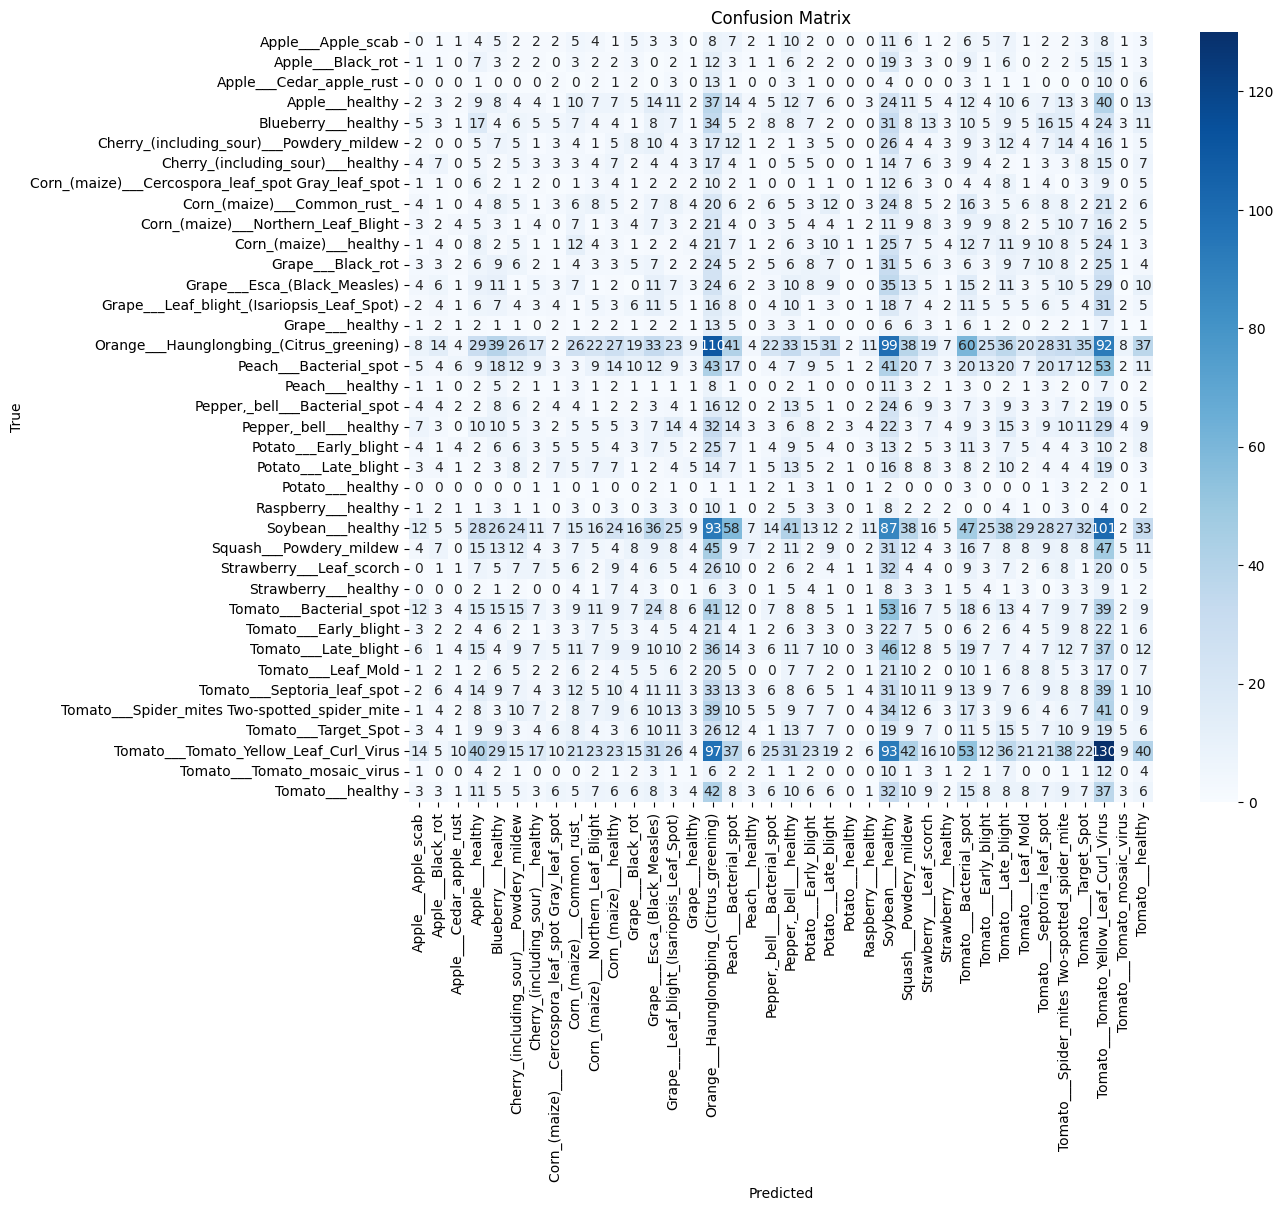

In [67]:
# Classification report
print("Classification Report:")
print(classification_report(true_classes, pred_classes, target_names=class_labels))

# Confusion matrix
conf_matrix = confusion_matrix(true_classes, pred_classes)

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, xticklabels=class_labels, yticklabels=class_labels, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


AUC Score: 0.4991


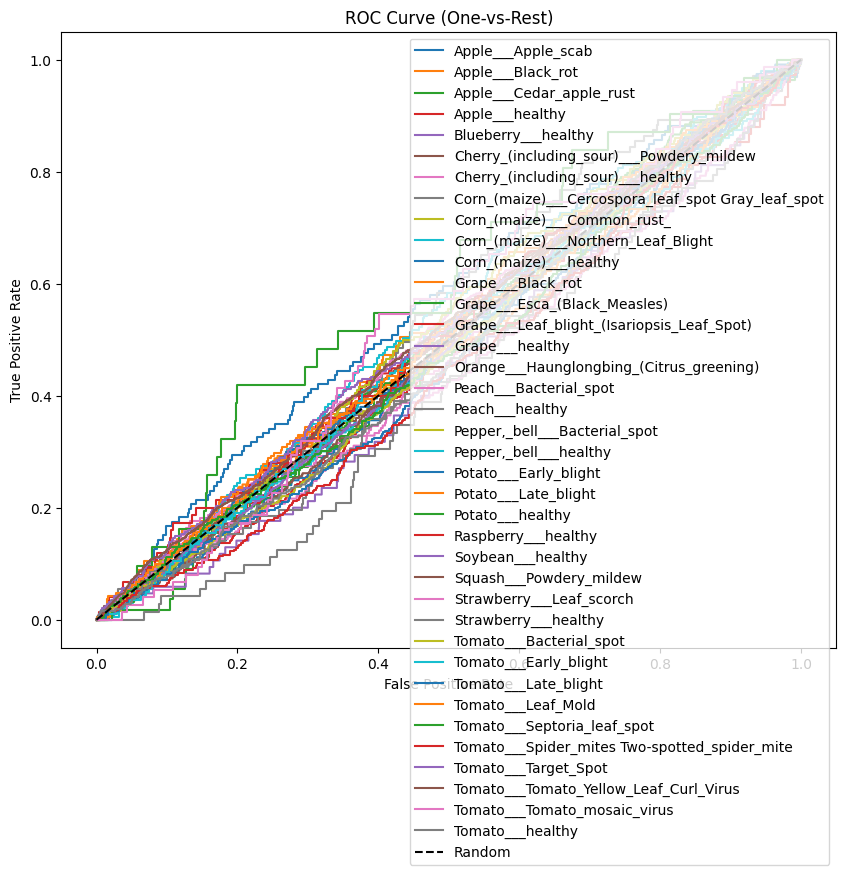

In [68]:
from sklearn.preprocessing import label_binarize

# Binarize true labels for ROC
y_true_bin = label_binarize(true_classes, classes=list(range(len(class_labels))))
n_classes = y_true_bin.shape[1]

# Compute AUC score
auc_score = roc_auc_score(y_true_bin, pred_probs, multi_class='ovr')
print(f"AUC Score: {auc_score:.4f}")

# Plot ROC curve
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], pred_probs[:, i])
    plt.plot(fpr, tpr, label=f'{class_labels[i]}')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend()
plt.show()


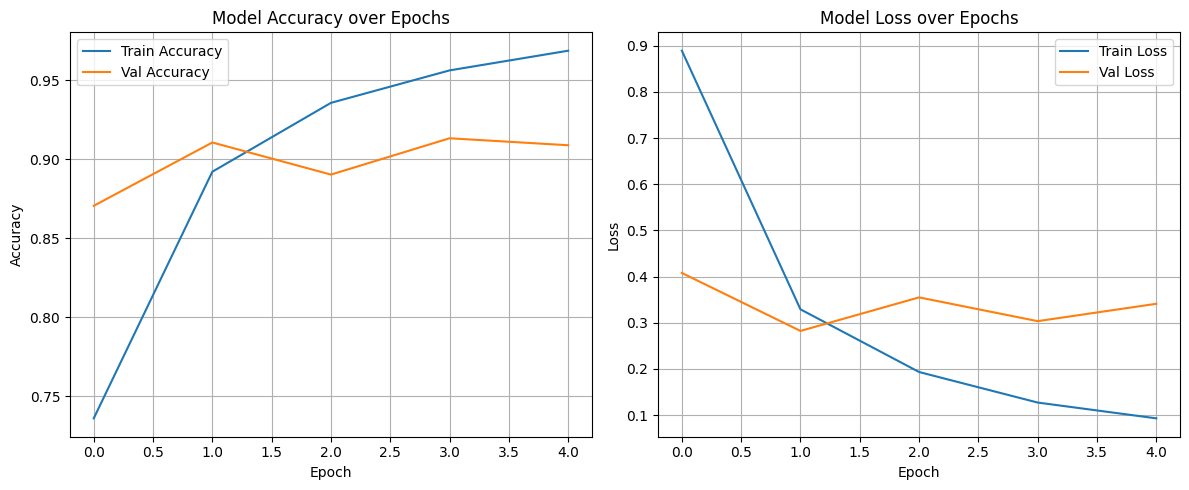

In [69]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
